https://www.kaggle.com/datasets/arushchillar/disneyland-reviews


The dataset includes 42,000 reviews of 3 Disneyland branches - Paris, California and Hong Kong, posted by visitors on Trip Advisor.

Column Description:

    Review_ID: unique id given to each review
    Rating: ranging from 1 (unsatisfied) to 5 (satisfied)
    Year_Month: when the reviewer visited the theme park
    Reviewer_Location: country of origin of visitor
    Review_Text: comments made by visitor
    Branch: location of Disneyland Park

# Reading Data

Importing Packages

In [1]:
from IPython.display import Image # Inserting Images
import re #Regex functions
import contractions
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # creating Visualizations

 Reading CSV File

In [2]:
df = pd.read_csv(r'C:\Users\stanl\OneDrive\Desktop\Projects\Disneyland_Reviews\DisneylandReviews.csv',encoding = "ISO-8859-1")

# 1. Data Preparation

## 1.1 Renaming columns

In [3]:
df = df.rename(columns = {'Review_Text':'Review','Branch':'Location'})
df.columns

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review',
       'Location'],
      dtype='object')

For Year_Month na or null values are not showing up but value_counts show that data used 'missing' to indentify null or na values

## 1.1 Missing Values

In [4]:
print(df.Year_Month.isna().sum())
print(df.Year_Month.isnull().sum())

0
0


After inspection of all rows, only column Year_Month has missing values fo 2613 labled as 'missing'

In [5]:
print(df.Year_Month.value_counts()) 

missing    2613
2015-8      786
2015-7      759
2015-12     701
2015-6      692
           ... 
2010-8        7
2010-5        4
2019-5        2
2010-3        2
2010-4        1
Name: Year_Month, Length: 112, dtype: int64


Replace 'missing' with np.nan so pandas can identify null/na values

In [6]:
df['Year_Month'] = df['Year_Month'].replace('missing', np.nan)

Pandas now can recognize nan values

In [7]:
df['Year_Month'].isna().sum()

2613

## 1.2 Duplicate Values

Considering removing duplicate reviews more important than duplicate Review_ID since duplicate reviews are not useful. 
    
    Duplicate reviews = text is all the same

24 Duplicate Reviews Found

In [8]:
df.duplicated(subset=['Review']).value_counts()

False    42632
True        24
dtype: int64

Keeps first occurence of review and removes duplicates from original dataframe

In [9]:
df.drop_duplicates(subset='Review', inplace=True, keep='first')

All duplicate reviews have been removed

In [10]:
df.duplicated(subset=['Review']).value_counts()

False    42632
dtype: int64

# 2. Text Preprocessing

## 2.1 Splitting Year Month into seperate columns

In [11]:
df['Year'] = df['Year_Month'].str.split('-').str.get(0)
df['Month'] = df['Year_Month'].str.split('-').str.get(1) # Splits column by delimiter '-'
df['Year'].fillna('NaN', inplace=True)
df['Month'].fillna('NaN', inplace=True)
# df = df.drop(columns='Year_Month') # drops old column after creating new columns

## 2.2 Cleaning up Location Column

In [12]:
df.Location = df.Location.str.replace("Disneyland_","") # Removes string "Disneyland_"
df.Location = df.Location.str.replace("HongKong","Hong Kong") # Add space
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review,Location,Year,Month
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Hong Kong,2019,4
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Hong Kong,2019,5
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Hong Kong,2019,4
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Hong Kong,2019,4
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Hong Kong,2019,4
...,...,...,...,...,...,...,...,...
42651,1765031,5,NaN,United Kingdom,i went to disneyland paris in july 03 and thou...,Paris,NaN,NaN
42652,1659553,5,NaN,Canada,2 adults and 1 child of 11 visited Disneyland ...,Paris,NaN,NaN
42653,1645894,5,NaN,South Africa,My eleven year old daughter and myself went to...,Paris,NaN,NaN
42654,1618637,4,NaN,United States,"This hotel, part of the Disneyland Paris compl...",Paris,NaN,NaN


## 2.3 Creating a Quarter Column

In [13]:
def convert_to_int(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return np.nan

df['Year'] = df['Year'].apply(convert_to_int)
df['Month'] = df['Month'].apply(convert_to_int)

df['Quarter'] = df.apply(lambda row: round((row['Month'] - 1) / 3) + 1 if not pd.isna(row['Month']) else pd.NA, axis=1)
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review,Location,Year,Month,Quarter
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Hong Kong,2019.0,4.0,2
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Hong Kong,2019.0,5.0,2
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Hong Kong,2019.0,4.0,2
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Hong Kong,2019.0,4.0,2
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Hong Kong,2019.0,4.0,2
...,...,...,...,...,...,...,...,...,...
42651,1765031,5,NaN,United Kingdom,i went to disneyland paris in july 03 and thou...,Paris,NaN,NaN,NaN
42652,1659553,5,NaN,Canada,2 adults and 1 child of 11 visited Disneyland ...,Paris,NaN,NaN,NaN
42653,1645894,5,NaN,South Africa,My eleven year old daughter and myself went to...,Paris,NaN,NaN,NaN
42654,1618637,4,NaN,United States,"This hotel, part of the Disneyland Paris compl...",Paris,NaN,NaN,NaN


## 2.4 Noise Removal of Review Column
The actual raw text of disneylands reviews needs to be process to allow better performance of NLP techniques (Faster Performance)

Common cleaning methods
* Lowercasing the data
* Removing Puncuatations
* Removing Numbers
* Removing extra space
* Replacing the repetitions of punctations
* Removing Emojis
* Removing emoticons
* Removing Contractions

For this dataset steps taken for Preprocessing:
* Seperate Contractions
* Remove Special Characters
* Remove Single Characters
* Remove Multiple Spaces
* Replace multiple Spaces with Single Space
* Remove URLS
*

### Seperate Contractions

In [14]:
# Define a function to fix contractions
def fix_contractions(text):
    return contractions.fix(text)

df['Review'] = df['Review'].apply(fix_contractions)


### Removing Special Characters and Lowercase Conversion

In [15]:
df.Review = df.Review.apply(lambda x: re.sub(r'\W'," ",x)) # special characters
df.Review = df.Review.apply(lambda x: re.sub(r'\s+[a-zA-Z]\s+'," ",x)) # single characters
df.Review = df.Review.apply(lambda x: re.sub(r'\^[a-zA-Z]\s+'," ",x)) # multiple spaces
df.Review = df.Review.apply(lambda x: re.sub(r'\s+'," ",x)) # replace multiple spaces with single space
df.Review = df.Review.apply(lambda x: re.sub(r'(https?://\S+)',"",x)) # remove urls
df.Review = df.Review.apply(lambda x: re.sub(r'^b\s+',"",x)) # string b at beginning if any


### Lowercase Conversion

In [16]:
df.Review = df.Review.str.lower() # Lowercase review

What about Stop Words?
* In the case for sentiment analysis. Keeping stop words could be useful as it only affects computational speed. For other methods of Text Preprocessing such as Bag-of-Words or TF-IDF, it could be useful and will be done later for other NLP Methods.


## 2.5 Word Normalization

There are 3 common techniques for normalization:
* Lemmatization
* Stemming
* Tokenization

For each NLP Technique, I will apply these methods but not at this moment.

# 3. Sentiment Analysis Using VADER

Vader and Textblob are packages that were trained to determined sentiment on text data and have their own use cases but I will apply sentiment analysis using Vader.
* Vader was designed to run sentiment analysis on social media text (commonly short) so more informal and is trained to understand punuactions, slang, emojis, captialization and intensifiers in social media conversation.
* Textblob is considered more versatitle for wide range of texts (long or short)
* Vader provides compound score of negative and positive polarity while Textblob provides polarity of negative and positive sentitments seperately
* Subjectivity is percentage of review that contains personal opinion vs factual information
* Polarity refers to how postive, neutral, or negative sentiment text is where <0 is Negative, 0 is Neutral, >0 is Postive

### What about Tokenization of the Reviews?
* Both Vader and Textblob will tokenize text in its pipeline.

## 3.1 Determine Sentiment

Importing Vader Package and creating Function

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')



# VADER Sentiment Analysis
def analyze_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\stanl\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
# Vader Results
sentiments_results = df

sentiments_results['sentiment_scores'] = df['Review'].apply(analyze_sentiment)

sentiments_results['compound_sentiment'] = sentiments_results['sentiment_scores'].apply(lambda x: x['compound'])

In [21]:
sentiments_results.loc[1,'Review']

'its been while since last time we visit hk disneyland yet this time we only stay in tomorrowland aka marvel land now they have iron man experience d newly open ant man d wasp ironman great feature so exciting especially whole scenery of hk hk central area to kowloon antman changed by previous buzz lightyear more or less same but am expecting to have something most however my boys like it space mountain turns into star wars this 1 is great for cast members staffs felt bit minus point from before just dun feel like its disney brand seems more local like ocean park or even worst they got no smiling face but just want to you to enter attraction leave hello this is supposed to be happiest place on earth brand but just really do not feel it bakery in main street now have more attractive delicacies disney theme sweets these are good points last they also have starbucks now inside the theme park '

Based on the compound sentiment, we can see that it provides a level or degree of sentiment to each review that otherwise would be difficult to see based on just the Rating of 1-5 stars alone.

A compound sentiment is an aggregation of negative, neutral and positive polarity scores for a more nuanced sentiment where:
* 1 = most positive
* 0 = neutral
* 2 = most negative

Luckily, Vader helps calculate this compound sentiment for easy analysis.  

### How can this be used for the business for park improvement?
An approach to these could be first seperating the reviews based on location of park since parks are different and not every park has the same attractions, restaurants, services, etc.

## 3.2 Subsetting Data based on Park

In [22]:
sentiments_results_california = sentiments_results.loc[sentiments_results['Location'] == 'California']
sentiments_results_paris = sentiments_results.loc[sentiments_results['Location'] == 'Paris']
sentiments_results_hong_kong =sentiments_results.loc[sentiments_results['Location'] == 'Hong Kong']

Once the reviews are subsetted based on location. I can then focus on another subset of reviews where sentiment is below 0 indicating negative sentiment.

## 3.3 Graphing Distribution of Reviews by Compound Sentiment

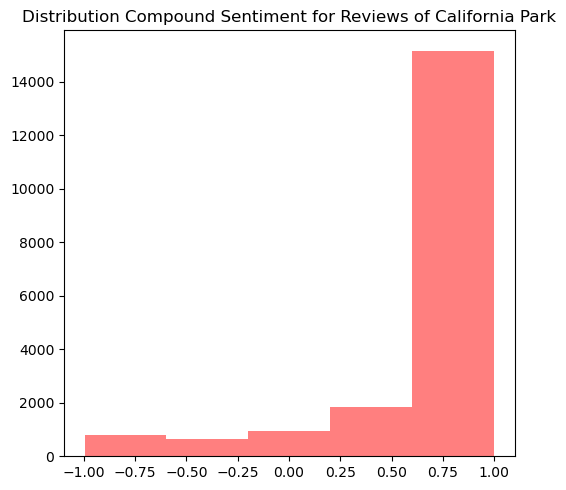

In [23]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.hist(sentiments_results_california['compound_sentiment'], bins=5, color='red', alpha=0.5)
plt.title('Distribution Compound Sentiment for Reviews of California Park')

plt.tight_layout()
plt.show()

## 3.4 Analysis and Conclusion 

If I was inovlved with trying to improve the California Park, I would maybe first determine which reviews to analyze first so I could set a threshold of compound sentiment to subset reviews negative or positive.
Example:
* Analyzing positive reviews where compound sentiment is between 0.25 and .75 to find out how to make happy visitors even more satisfied with their visit to the park.
* Analyzing negative reviews between -1 and -0.75 to understand what visitors are frustrated with during their visits and hopefully implement features to avoid recurring frustrations.


Next, Lets try to analyze all negative sentiment reviews that have to determine what can be done to improve the California park.

# 4. Named Entity Recognition

Named Entity Recognition is a way for us to categorize or group words within text. Some categories are:
* Person
* Organization
* Place/Location
* Date
* Ordinal
* Numerical

The Spacy package allows to perform quick NER over NTLK's packages

In [24]:
import spacy
from collections import Counter
spacy.load('en_core_web_sm')

## 4.1 Preprocessing Reviews of Negative Reviews
* Tokenization seperates each word in our review by a delimiter usually ',' for better peformance.
* NER from Spacy tokenizes the review for us in its pipeline

### Subset to include only negative reviews where compund sentiment < 0

In [25]:
sentiments_results_california_negative_ner = sentiments_results_california.loc[sentiments_results_california['compound_sentiment'] < 0]
sentiments_results_paris_negative_ner = sentiments_results_paris.loc[sentiments_results_paris['compound_sentiment'] < 0]
sentiments_results_hong_kong_negative_ner =sentiments_results_hong_kong.loc[sentiments_results_hong_kong['compound_sentiment'] < 0]

### 4.2 Run NER and group entities frequenies by entity category

In [26]:
# Load the English NER model
nlp = spacy.load("en_core_web_sm")

sentiments_results_california_negative_ner['ner_results'] = sentiments_results_california_negative_ner['Review'].apply(lambda text: [(ent.text, ent.label_) for ent in nlp(text).ents])
sentiments_results_paris_negative_ner['ner_results'] = sentiments_results_paris_negative_ner['Review'].apply(lambda text: [(ent.text, ent.label_) for ent in nlp(text).ents])
sentiments_results_hong_kong_negative_ner['ner_results'] = sentiments_results_hong_kong_negative_ner['Review'].apply(lambda text: [(ent.text, ent.label_) for ent in nlp(text).ents])


C:\Users\stanl\AppData\Local\Temp\ipykernel_6444\186426782.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiments_results_california_negative_ner['ner_results'] = sentiments_results_california_negative_ner['Review'].apply(lambda text: [(ent.text, ent.label_) for ent in nlp(text).ents])
C:\Users\stanl\AppData\Local\Temp\ipykernel_6444\186426782.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiments_results_paris_negative_ner['ner_results'] = sentiments_results_paris_negative_ner['Review'].app

### 4.3 Function to Create Subplots

### 4.4 Visualize Top 5 Entities for Each Entity Category for each Park

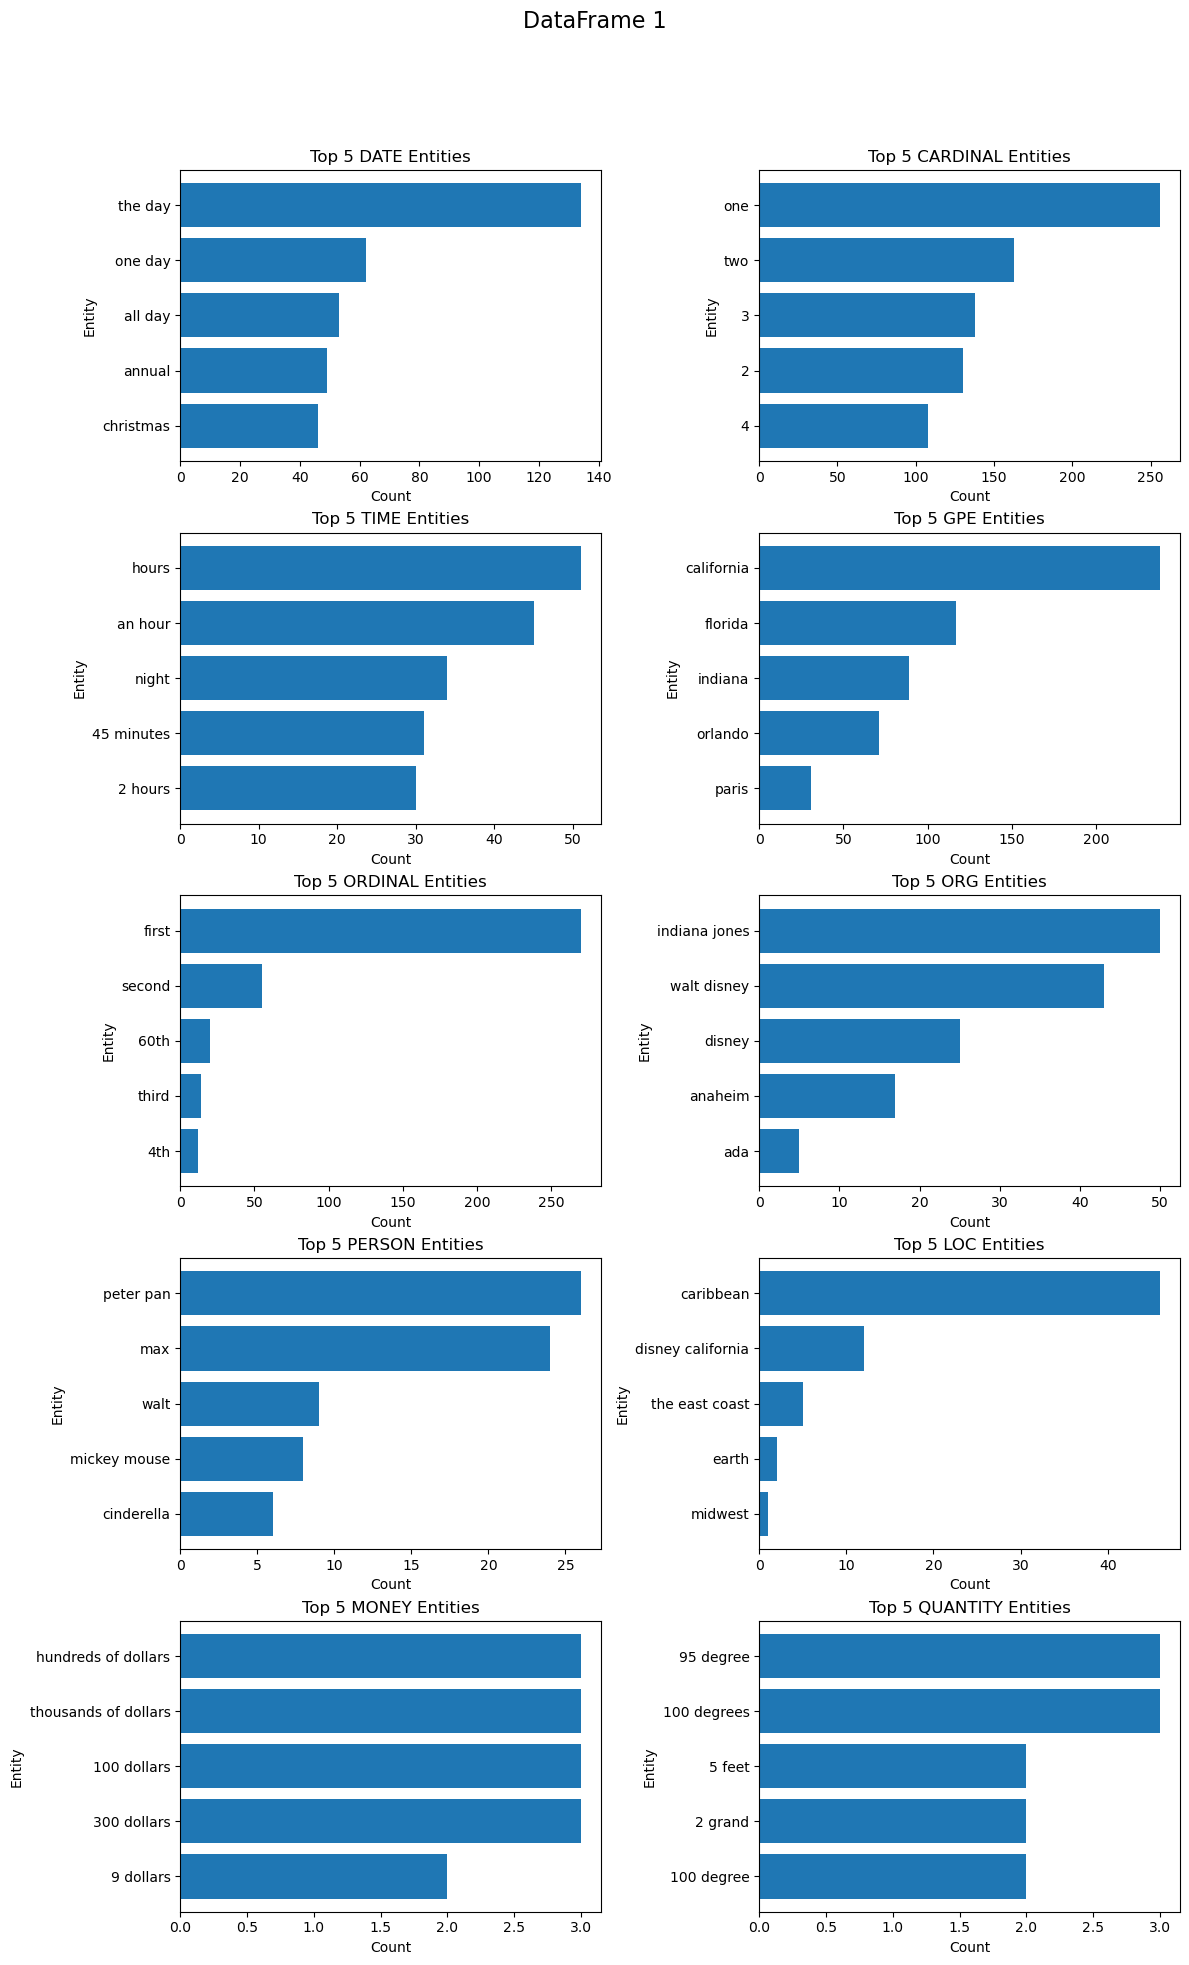

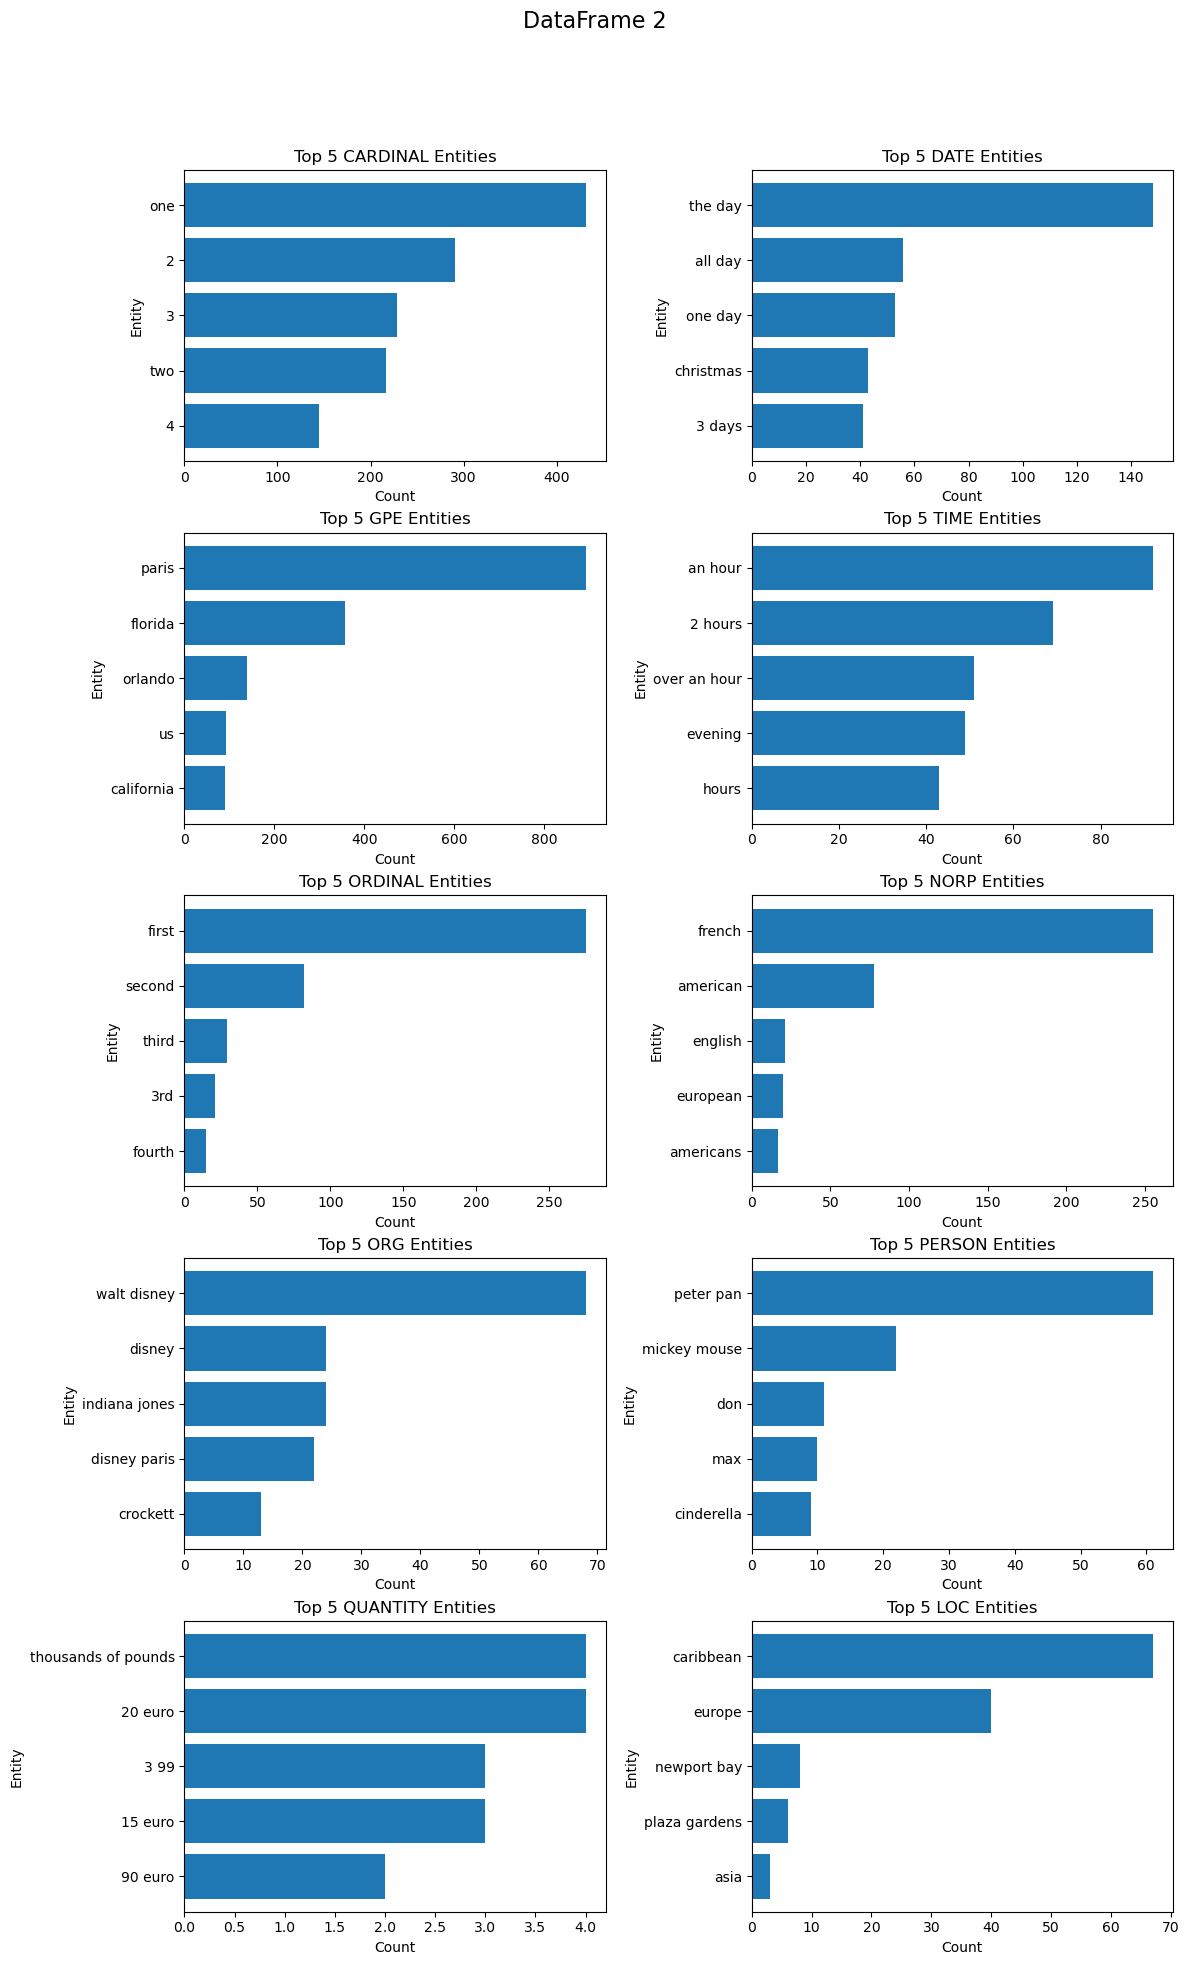

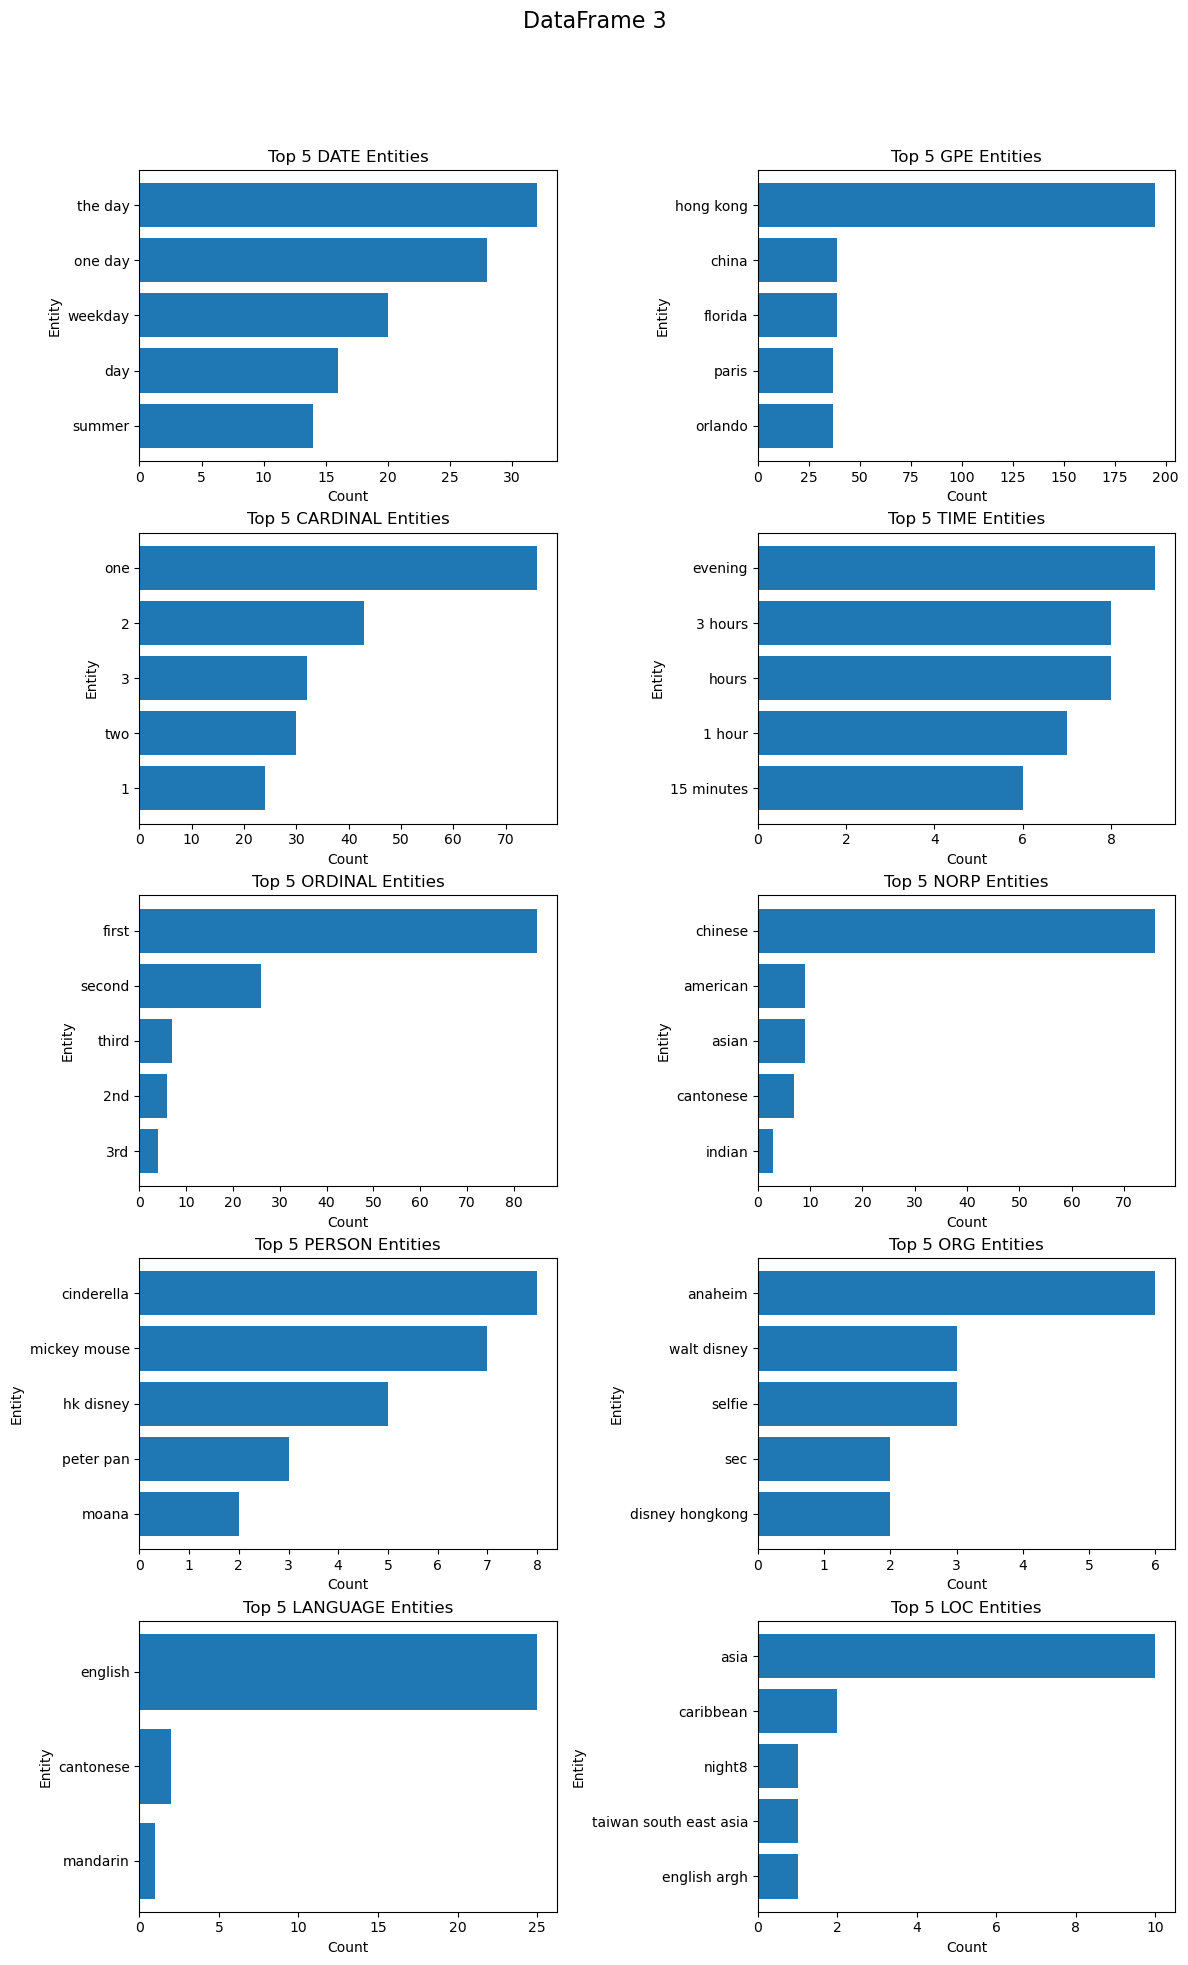

In [27]:
# List of DataFrames
dataframes = [sentiments_results_california_negative_ner, sentiments_results_paris_negative_ner, sentiments_results_hong_kong_negative_ner]

# Function to extract and plot top 5 entities for each category
def plot_top_entities(df, ax, top_n_categories=10, top_n_entities=5):
    if df['ner_results'].apply(lambda x: isinstance(x, list)).all():
        # Combine all entities from all categories
        combined_entities = {}
        for ner_results in df['ner_results']:
            for entity, category in ner_results:
                if category not in combined_entities:
                    combined_entities[category] = {}
                if entity not in combined_entities[category]:
                    combined_entities[category][entity] = 0
                combined_entities[category][entity] += 1

        # Sort categories by total entity count in descending order
        sorted_categories = sorted(combined_entities.keys(), key=lambda x: sum(combined_entities[x].values()), reverse=True)

        # Limit the number of categories to the top_n_categories
        sorted_categories = sorted_categories[:top_n_categories]

        for i, category in enumerate(sorted_categories):
            # Sort entities within the category by count in descending order
            sorted_entities = sorted(combined_entities[category].items(), key=lambda x: x[1], reverse=True)[:top_n_entities]
            entities, counts = zip(*sorted_entities) if sorted_entities else ([], [])

            ax[i].barh(entities, counts)
            ax[i].set_xlabel('Count')
            ax[i].set_ylabel('Entity')
            ax[i].set_title(f'Top {top_n_entities} {category} Entities')
            ax[i].invert_yaxis()

# Create a figure with subplots (5 rows and 2 columns) for each DataFrame
for i, df in enumerate(dataframes, start=1):
    num_categories = 10  # Number of categories to display
    num_entities = 5     # Number of entities to display per category
    num_rows = min(num_categories, len(df['ner_results']))

    fig, axes = plt.subplots(5, 2, figsize=(12, 20))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    # Flatten the axes array for easy indexing
    axes = axes.flatten()

    # Call the function to plot top entities for each DataFrame
    plot_top_entities(df, axes, top_n_categories=num_categories, top_n_entities=num_entities)

    # Hide any unused subplots
    for j in range(num_rows, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout and display the subplots
    plt.tight_layout()
    plt.suptitle(f'DataFrame {i}', fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

Dataframe 1 = California
Dataframe 2 = Paris
Dataframe 3 = Hong Kong

## 4.4 Analysis and Conclusion

### What inferencees can we make based on these entities?

### California Disneyland
* For Time Entity, it seems like there are some visitors where it takes hours(probably refering to rides) and
* For organization Entity, it seems like Indiana Jones Ride has some negative reviews. Based on some news articles, it seemed like the ride based on 2019 was due for a refurbishment. It seems the ride had some mechanical issues which could have led to visitors leaving negative reviews about the ride.
* For Person Entity, seems like Peter Pan ride is getting some negative reviews as well.

### Paris Disneyland
* For Location Entity, carribbean which is refering to the ride is mentioned in negative reviews
* For Person Entity, seems like Peter Pan ride in Paris also is being mentioned in negative reviews.
* For Organization Entity, it is showing a couple of reviews mentioning crockett which may refer to the Disney Davy Crockett Ranch.

### Hong Kong Disneyland
* It seems like for Hong Kong, not much inferences or conclusions can be made which is fine, which is why other NLP techniques available and not all is lost.
* One most notable thing is with the Person Entity where Cinderella is mentioned which can refer to the Cinderella Carousel.

After analyzing the results of the NER, we can see that NER is useful to point us into the right direction of how each park can be improved though we are under the assumption that the reviews for Paris and Hong Kong being were english speaking visitors or were translated. In the case for non english speaking reviews, there are other packages and tools available created by others that can provide sentiment analysis for other language text data.